<a href="https://colab.research.google.com/github/xEsseax/test_cases/blob/main/wink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

! ДОПИСАТЬ ВВЕДЕНИЕ

# Введение

Анализ выполнен в рамках тестового задания в команду Wink.

В нашем распоряжении данные продаж некой производственной фармацевтической компании, а также данные о количестве диагностированных пациентов. Данные неидеальны.

Задача: обработать данные и выбрать наиболее важные выводы для демонстрации бизнесу. Ограничений по метрикам по условиям ТЗ нет.

Предварительный план:
1. Чтение и предварительный обзор данных. Изучение датасета на предмет наличия пропусков
2.

# Технический раздел

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# функция для отрисовки распределения значений в одном столбце
def column_draw(data, column):
  data[column].hist()
  plt.title(data[column].name)
  plt.xlabel('meaning')
  plt.ylabel('quantity')
  plt.show()

In [3]:
# функция для вывода описательной информации столбца
def column_describe(data, column):
  print(f'Количество уникальных значений = {len(data[column].unique())}')
  print()
  print('Количество значений в стоблце:')
  print(data[column].value_counts())

In [ ]:
#функция для преобразования дат в datetime с учётом наличия различий в формате записи
def date_transformer(row):
  try:
    return pd.to_datetime(row['Date'], format='%Y-%m-%d %H:%M:%S')
  except:
    return pd.to_datetime(row['Date'], format='%d/%m/%Y %H:%M:%S')


# Чтение и предварительный обзор данных

In [4]:
sales = pd.read_excel('Russia Data Analyst Data Set_original (1).xlsx', sheet_name='Sales')

In [5]:
# предварительный обзор структуры датасета
sales.head()

,Product Family,Product,Customer,Business Unit,Currency,Date,Sales
0,FAM1,Prd1,Cust1,NaN,M.CHF,2019-05-02 00:00:00,473885
1,FAM1,Prd1,Cust1,NaN,M.CHF,28/02/2019 00:00:00,-23694
2,FAM1,Prd1,Cust1,NaN,M.CHF,29/03/2019 00:00:00,23694
3,FAM1,Prd1,Cust1,NaN,M.CHF,31/03/2019 00:00:00,-23694
4,FAM1,Prd1,Cust1,NaN,M.CHF,15/04/2019 00:00:00,-23694


In [6]:
# количество и тип данных
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Family  5576 non-null   object
 1   Product         5576 non-null   object
 2   Customer        5576 non-null   object
 3   Business Unit   3072 non-null   object
 4   Currency        5576 non-null   object
 5   Date            5576 non-null   object
 6   Sales           5576 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 305.1+ KB


Итого, у нас пять с половиной тысяч строк, 7 столбцов, 1 - с числовым типом данных, остальные - строковые. В столбце Business Unit почти 40 процентов явных пропусков.

Дальше посмотрим отдельно на каждый столбец

## Product Family

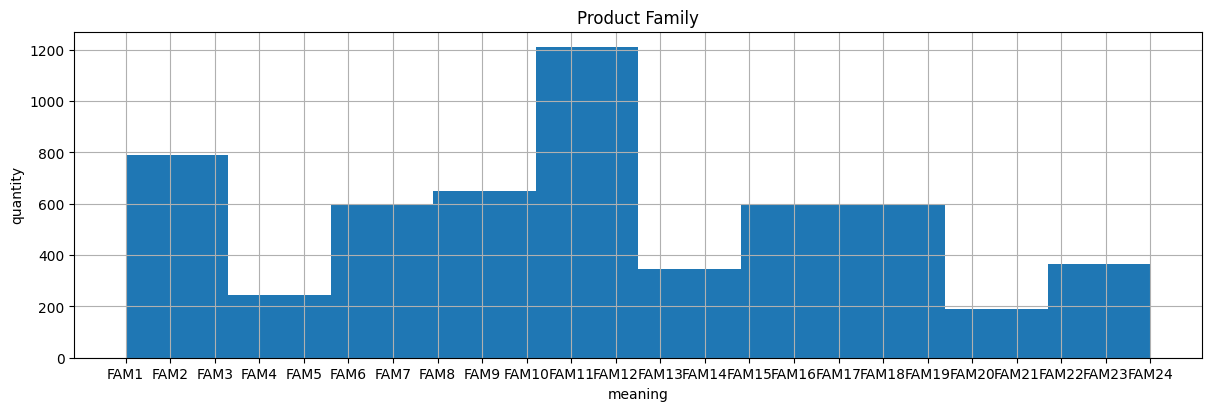

In [7]:
plt.figure(figsize=(12, 4), layout="constrained")
column_draw(sales, 'Product Family')

Попусков нет, признак категориальный. У нас 24 категории продуктов. Из гистограммы видно, что самые популярные в данных группы - 11 и 12 (суммарно чуть больше 40 процентов всех данных), наименее популярные - 4, 5, 20 и 21.

# Product

Предполагается, что это вид продукта, категориальный признак. Гистограмму строить не будем - скорее всего здесь много вариантов значений. Проверяем:

In [8]:
column_describe(sales, 'Product')

Количество уникальных значений = 56

Количество значений в стоблце:
Prd17    382
Prd32    298
Prd33    292
Prd27    264
Prd45    248
Prd30    236
Prd53    230
Prd44    218
Prd4     192
Prd46    184
Prd31    184
Prd37    182
Prd42    180
Prd43    174
Prd48    170
Prd47    166
Prd9     166
Prd19    102
Prd28     80
Prd11     80
Prd22     78
Prd10     78
Prd24     76
Prd26     76
Prd14     76
Prd8      74
Prd36     74
Prd38     72
Prd20     66
Prd34     64
Prd35     62
Prd16     60
Prd1      58
Prd2      58
Prd13     56
Prd40     54
Prd15     52
Prd54     52
Prd55     50
Prd21     48
Prd18     46
Prd12     44
Prd39     36
Prd56     32
Prd41     24
Prd25     18
Prd7      18
Prd5      10
Prd3       8
Prd52      6
Prd23      4
Prd49      4
Prd50      4
Prd51      4
Prd29      4
Prd6       2
Name: Product, dtype: int64


Итого, у нас 56 разных продуктов, явных пропусков нет, неявных - тоже. Есть как продукты, которые значительно представлены в выборке (более ста строк), так и те, которые представлены в единичных объёмах. Вопрос о репрезентативности статистики по таким продуктам будем рассматривать в соответствующем разделе, здесь же ограничимся пока кратким обзором.

## Customer

Категориальный признак с идентификатором покупателя. Предполагаем здесь большое количество разных значений, обзорную гистограмму тоже не будем строить.

In [9]:
column_describe(sales, 'Customer')

Количество уникальных значений = 37

Количество значений в стоблце:
Cust12    1016
Cust29     672
Cust27     546
Cust3      496
Cust30     486
Cust23     322
Cust5      286
Cust7      214
Cust17     192
Cust9      172
Cust6      154
Cust1      144
Cust28     122
Cust24      98
Cust10      96
Cust4       90
Cust11      64
Cust25      62
Cust26      60
Cust2       48
Cust34      40
Cust35      36
Cust31      34
Cust37      32
Cust22      16
Cust15      16
Cust21      14
Cust19      12
Cust8       10
Cust20       6
Cust18       4
Cust16       4
Cust13       4
Cust14       2
Cust32       2
Cust33       2
Cust36       2
Name: Customer, dtype: int64


Итого, у нас 37 уникальных покупателей, среди них есть как очень крупный (более тысячи покупок, возможно поставщик), так и постоянные клиенты (несколько сотен покупок), а также покупатели с разовыми покупками. Вероятно, при проведении исследовательского анализа можно будет разбить покупателей по группам, ориентируясь на количество покупок.

## Business Unit

Бизнес-единица - вероятно, дочерние компании. Предполагаем, что это качественный признак. Посмотрим на вариативность значений в этом столбце:

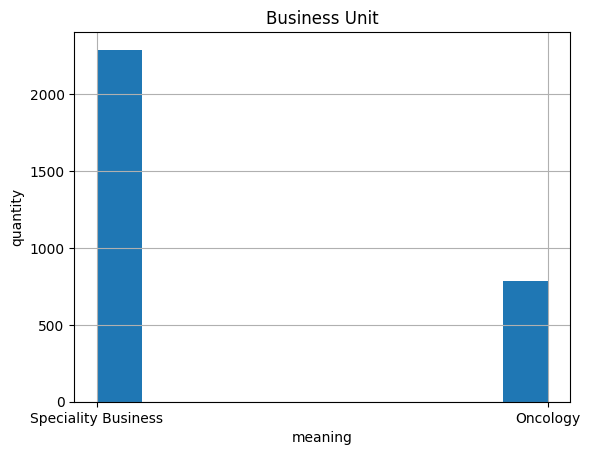

In [10]:
column_draw(sales, 'Business Unit')

Около половины датасета - Speciality Business, порядка 13 процентов - Онкология. Столбцец содержит пропуски. Предполагаем, что пропуск в данном случае соответствует ситуации, когда продажи были совершены напрямую компанией. Для удобства дальнейшей работы с данными заполняем пропуски заглушкой - пусть таким ситуациям соответствует значение "Head"

In [11]:
sales['Business Unit'] = sales['Business Unit'].fillna('Head')

Итого знаем, что чуть больше половины всех продах имеющейся выборки совершены напрямую компанией.

# Currency

Предположительно валюта, в которой был произведён расчёт. Посмотрим на значения:

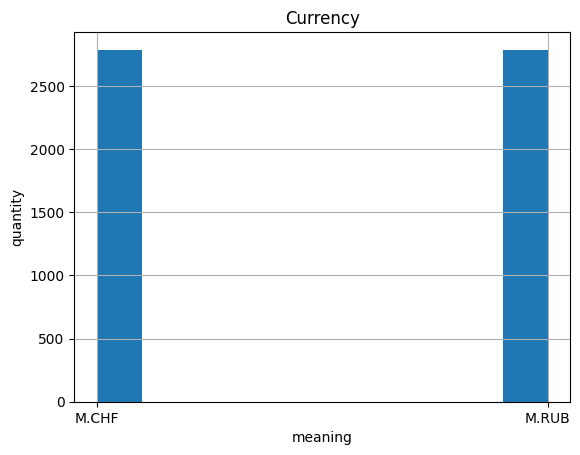

In [12]:
column_draw(sales, 'Currency')

Итого, у нас две валюты - российские рубли и швейцарские франки. Необходимо будет это учесть при сравнительном анализе, вычислении метрик и тд.

# Date

Следующий столбец хранит информацию о дате совершения сделки. Посмотрим на диапазон, покрывающийся имеющейся выборкой. Для удобства дальнейшей работы сначала преобразуем данные в более корректный формат. Посмотрим снова визуально на даты:

In [13]:
sales.head()

,Product Family,Product,Customer,Business Unit,Currency,Date,Sales
0,FAM1,Prd1,Cust1,Head,M.CHF,2019-05-02 00:00:00,473885
1,FAM1,Prd1,Cust1,Head,M.CHF,28/02/2019 00:00:00,-23694
2,FAM1,Prd1,Cust1,Head,M.CHF,29/03/2019 00:00:00,23694
3,FAM1,Prd1,Cust1,Head,M.CHF,31/03/2019 00:00:00,-23694
4,FAM1,Prd1,Cust1,Head,M.CHF,15/04/2019 00:00:00,-23694


Даже по выведенным первым строчкам виден нюанс записи даты: могут использоваться разные разделители и формат записи.

In [19]:
def date_transformer(row):
  try:
    return pd.to_datetime(row['Date'], format='%Y-%m-%d %H:%M:%S')
  except:
    return pd.to_datetime(row['Date'], format='%d/%m/%Y %H:%M:%S')


In [22]:
sales['Date'] = sales.apply(date_transformer, axis=1)

In [23]:
#проверяем корректность преобразования
sales['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5576 entries, 0 to 5575
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
5576 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 43.7 KB


Теперь можно исследовать имеющийся временной диапазон.

In [28]:
sales['Date'].describe()

<ipython-input-28-6c292f7da4ea>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales['Date'].describe()


count                    5576
unique                    333
top       2019-12-07 00:00:00
freq                       76
first     2019-01-03 00:00:00
last      2020-12-05 00:00:00
Name: Date, dtype: object

Данные покрывают диапазон с 3 января 2019 года по 5 декабря 2020 года - то есть практически два года. Посмотрим на распределение:

<Axes: >

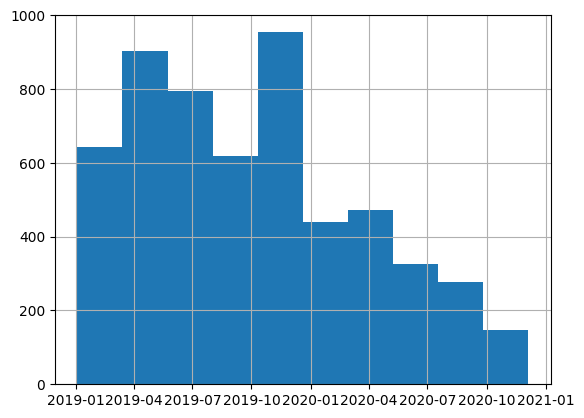

In [31]:
sales['Date'].dt.round('1D').hist()

Видны два явных пика - в середине и в конце 2019-го года. После 2020 виден явный спад по количеству сделок, представленных в данных. Если мы отталиваемся от репрезентативности выборки - можно предположить, что с 2020-го года стратегия продаж компании претерпела существенные изменения. Возможно, стала больше ориентироваться на крупные партии и оптовые поставки и/или перешла на экспорт и сделки за швейцарские франки :)

Выясним более детально в разделе, посвящённом исследовательскому анализу.

# Sales

Предполагаем, что это столбец, содержащий сумму сделки. Количественный признак. Посмотрим сначала на распределение значений "как есть":

In [33]:
sales['Sales'].describe()

count    5.576000e+03
mean     2.101602e+06
std      3.334958e+07
min     -4.270657e+08
25%      1.927750e+03
50%      2.671700e+04
75%      3.149420e+05
max      1.423552e+09
Name: Sales, dtype: float64

Обнаружена неочевидная проблема - данные о продажах не только положительные, но и отрицательные. Возможно, это могут быть суммы покупки и продажи (и наша фармацевтическая компания - ретейлер).

Посмотрим для примера историю по какому-нибудь одному продукту и покупателю и отсортируем по дате записи:

In [54]:
sales[(sales['Product']=='Prd1') & (sales['Customer']=='Cust1')].sort_values(by='Date')

,Product Family,Product,Customer,Business Unit,Currency,Date,Sales,datetime
1,FAM1,Prd1,Cust1,Head,M.CHF,2019-02-28,-23694,2019-02-28
30,FAM1,Prd1,Cust1,Head,M.RUB,2019-02-28,-1403616,2019-02-28
2,FAM1,Prd1,Cust1,Head,M.CHF,2019-03-29,23694,2019-03-29
31,FAM1,Prd1,Cust1,Head,M.RUB,2019-03-29,1403616,2019-03-29
3,FAM1,Prd1,Cust1,Head,M.CHF,2019-03-31,-23694,2019-03-31
32,FAM1,Prd1,Cust1,Head,M.RUB,2019-03-31,-1403616,2019-03-31
4,FAM1,Prd1,Cust1,Head,M.CHF,2019-04-15,-23694,2019-04-15
33,FAM1,Prd1,Cust1,Head,M.RUB,2019-04-15,-1403616,2019-04-15
5,FAM1,Prd1,Cust1,Head,M.CHF,2019-04-30,23694,2019-04-30
34,FAM1,Prd1,Cust1,Head,M.RUB,2019-04-30,1403616,2019-04-30


Явно заметна следующая структура:

1. В каждую дату сделки записаны две транзакции - в рублях и в швейцарских франках. При делении одной суммы на другую получается значение, примерно соответсвующее курсу франка. Как следствие - можно предположить, что это одна и та же сделка, занесённая в базу дважды в разных валютах - в рублях и во франках. Вероятно, это связано с тем, что сделка совершена российской компанией на международном рынке за франки по текущему курсу.

2. Хорошо заметно, что большиснтво транзакций делится на пары - отрицательное и положительное значение с одинаковой абсолютной величиной.

3. Исходя из этого можно сделать вывод, что отрицательная сделка соответствует факту выставления счёта клиенту, а положительная - оплата счёта клиентом (поступление денег на рассчётный счёт компании).

4. Бывают исключения и артефакты - нулевые сделки (возможно, поставки рекламных или тестовых образцов, или же аннулированные счета), а также ситуации, когда отрицательная и положительная суммы не совпадают по модулю - возможно, это соответствует случаям, когда покупатель гасит задолженность в несколько платежей или работает с компанией на условиях рассрочки.

Таким образом, для выявления закономерностей и дальнейшего анализа можем учитывать сделки с положительной суммой, совершённые в рублях.

In [57]:
#сохраняем в датасет для удобства
sales_filtered = sales[(sales['Currency']=='M.RUB') & (sales['Sales']>0)]